In [2]:
# importando modulos
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
#importando data-set bruto
df = pd.read_excel('HIST_PAINEL_COVIDBR_27ago2020.xlsx')

In [3]:
# mostrando os dados disponíveis no data-set bruto
df.dtypes

regiao                            object
estado                            object
municipio                         object
coduf                              int64
codmun                           float64
codRegiaoSaude                   float64
nomeRegiaoSaude                   object
data                      datetime64[ns]
semanaEpi                          int64
populacaoTCU2019                 float64
casosAcumulado                     int64
casosNovos                         int64
obitosAcumulado                    int64
obitosNovos                        int64
Recuperadosnovos                 float64
emAcompanhamentoNovos            float64
interior/metropolitana           float64
dtype: object

In [4]:
# filtrando dados para a região de Montes Claros
moc = df[['municipio','codmun','estado', 'semanaEpi', 'casosAcumulado', 'casosNovos', 'obitosNovos', 'obitosAcumulado']].where(df['codmun'] == 314330)

#retirando dados "perdidos" NaN
moc = moc.dropna()
moc

,municipio,codmun,estado,semanaEpi,casosAcumulado,casosNovos,obitosNovos,obitosAcumulado
429450,Montes Claros,314330.0,MG,13.0,0.0,0.0,0.0,0.0
429451,Montes Claros,314330.0,MG,13.0,0.0,0.0,0.0,0.0
429452,Montes Claros,314330.0,MG,14.0,0.0,0.0,0.0,0.0
429453,Montes Claros,314330.0,MG,14.0,0.0,0.0,0.0,0.0
429454,Montes Claros,314330.0,MG,14.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
429599,Montes Claros,314330.0,MG,35.0,4483.0,111.0,3.0,66.0
429600,Montes Claros,314330.0,MG,35.0,4507.0,24.0,0.0,66.0
429601,Montes Claros,314330.0,MG,35.0,4563.0,56.0,0.0,66.0
429602,Montes Claros,314330.0,MG,35.0,4719.0,156.0,4.0,70.0


In [6]:
# correlação entre dados - primeiro passo para analise com regressão linear

moc.corr()

,codmun,semanaEpi,casosAcumulado,casosNovos,obitosNovos,obitosAcumulado
codmun,NaN,NaN,NaN,NaN,NaN,NaN
semanaEpi,NaN,1.000000,0.764002,0.613228,0.444467,0.748620
casosAcumulado,NaN,0.764002,1.000000,0.742902,0.538832,0.997027
casosNovos,NaN,0.613228,0.742902,1.000000,0.560651,0.727778
obitosNovos,NaN,0.444467,0.538832,0.560651,1.000000,0.553036
obitosAcumulado,NaN,0.748620,0.997027,0.727778,0.553036,1.000000


In [7]:
moc[['casosAcumulado','semanaEpi']].corr()

,casosAcumulado,semanaEpi
casosAcumulado,1.000000,0.764002
semanaEpi,0.764002,1.000000


(0.0, 5258.424488321269)

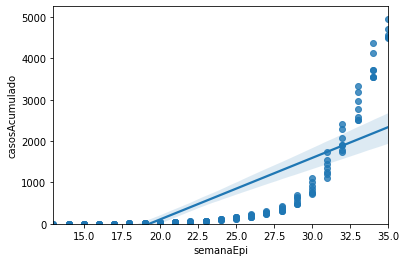

In [5]:
sns.regplot(x='semanaEpi', y = 'casosAcumulado', data= moc)
plt.ylim(0, )

In [10]:
moc[['obitosAcumulado', 'semanaEpi', 'casosAcumulado', 'obitosNovos', 'casosNovos']].corr()


,obitosAcumulado,semanaEpi,casosAcumulado,obitosNovos,casosNovos
obitosAcumulado,1.000000,0.748620,0.997027,0.553036,0.727778
semanaEpi,0.748620,1.000000,0.764002,0.444467,0.613228
casosAcumulado,0.997027,0.764002,1.000000,0.538832,0.742902
obitosNovos,0.553036,0.444467,0.538832,1.000000,0.560651
casosNovos,0.727778,0.613228,0.742902,0.560651,1.000000


<AxesSubplot:xlabel='obitosAcumulado', ylabel='casosAcumulado'>

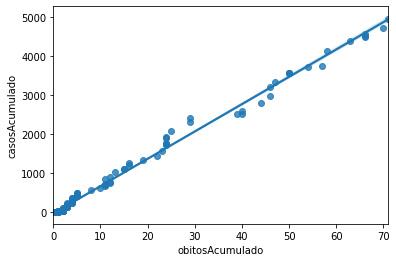

In [12]:
sns.regplot(x = "obitosAcumulado", y = "casosAcumulado", data = moc)

<AxesSubplot:xlabel='semanaEpi', ylabel='casosNovos'>

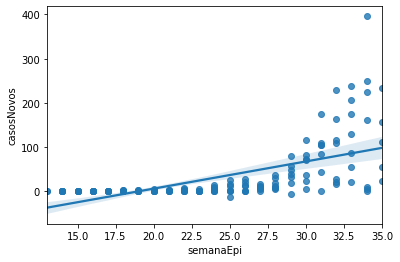

In [13]:
sns.regplot(x = 'semanaEpi', y = 'casosNovos', data = moc)

In [14]:
moc.describe()

,codmun,semanaEpi,casosAcumulado,casosNovos,obitosNovos,obitosAcumulado
count,154.0,154.000000,154.000000,154.000000,154.000000,154.000000
mean,314330.0,24.214286,731.201299,32.155844,0.461039,10.980519
std,0.0,6.381104,1243.392557,63.909876,1.253143,17.705459
min,314330.0,13.000000,0.000000,-12.000000,-1.000000,0.000000
25%,314330.0,19.000000,17.000000,0.000000,0.000000,1.250000
50%,314330.0,24.000000,116.000000,3.000000,0.000000,3.000000
75%,314330.0,30.000000,733.500000,25.500000,0.000000,11.000000
max,314330.0,35.000000,4952.000000,396.000000,10.000000,71.000000


In [15]:
moc.describe(include=['object'])

,municipio,estado
count,154,154
unique,1,1
top,Montes Claros,MG
freq,154,154


In [17]:
moc['obitosNovos'].value_counts()

 0.0     121
 1.0      17
 3.0       6
 4.0       4
 2.0       3
 5.0       1
 10.0      1
-1.0       1
Name: obitosNovos, dtype: int64

In [18]:
moc['obitosNovos'].value_counts().to_frame()

,obitosNovos
0.0,121
1.0,17
3.0,6
4.0,4
2.0,3
5.0,1
10.0,1
-1.0,1


In [19]:
obitos = moc['obitosNovos'].value_counts().to_frame()
obitos.index.name = "Frequencia_obitos"
obitos

,obitosNovos
Frequencia_obitos,
0.0,121
1.0,17
3.0,6
4.0,4
2.0,3
5.0,1
10.0,1
-1.0,1


In [31]:
# pivotar os dados de obitos